## ASSIGNMENT ON PRE-PROCESSING AND REGRESSION
The HR Analytics data of a multinational company is given. Please do the following 
analysis on the dataset.
1. Read the dataset to the python environment. 
2. Do necessary pre-processing steps.
3. Build a Regression model to predict Salary (Use MSE as metric and achieve it as 
low as possible

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_prediction.csv')

## Data Analysis

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null  values present in the data set. We will consider MonthlyIncome as the feature to predict

## Analyse categorical columns

In [6]:
data = df.copy()

In [7]:
data.describe(include =object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

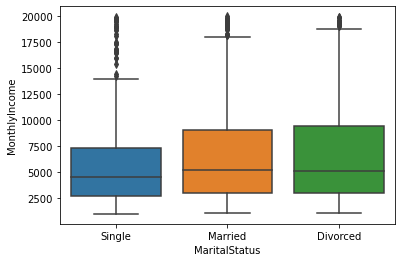

In [8]:
sns.boxplot(data = data, y = 'MonthlyIncome', x='MaritalStatus')

Income has variation w.r.t Marital status .Married and divorced seems no variation.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

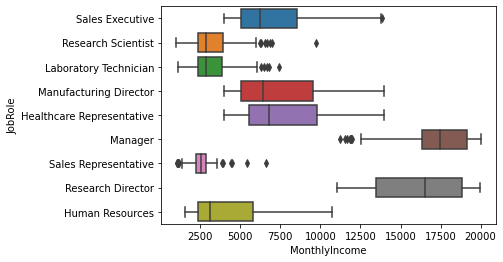

In [9]:
sns.boxplot(data = df, x = 'MonthlyIncome', y = 'JobRole')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Department'>

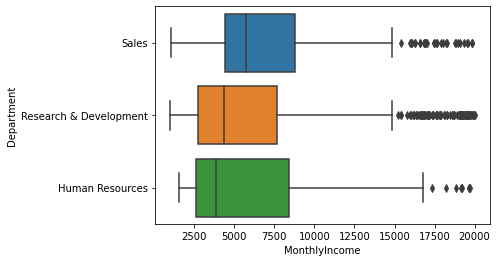

In [10]:
sns.boxplot(data = df, x = 'MonthlyIncome', y = 'Department')

Income varies with Job role.

<AxesSubplot:xlabel='BusinessTravel', ylabel='MonthlyIncome'>

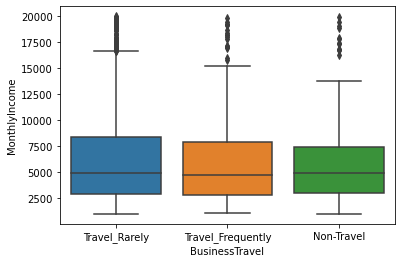

In [11]:
sns.boxplot(data = data, y = 'MonthlyIncome', x = 'BusinessTravel')

All three categories has almost same income.So will drop BusinessTravel

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

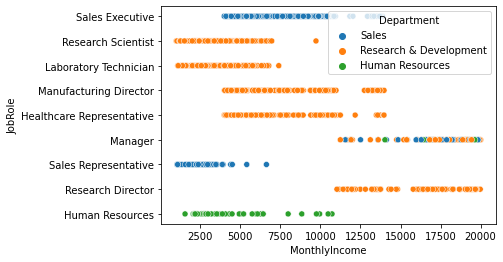

In [12]:
sns.scatterplot(data = df, x = 'MonthlyIncome', y = 'JobRole', hue = 'Department')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Department'>

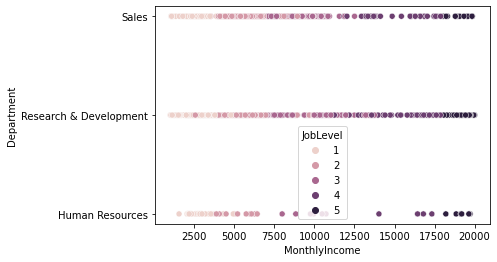

In [13]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y = 'Department')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Education'>

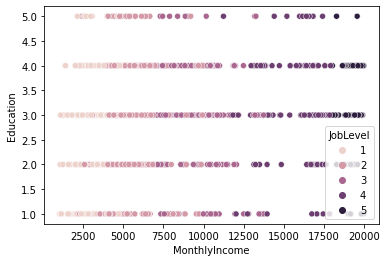

In [14]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y= 'Education')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

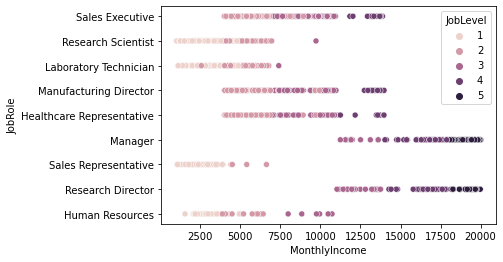

In [15]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y= 'JobRole')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='EducationField'>

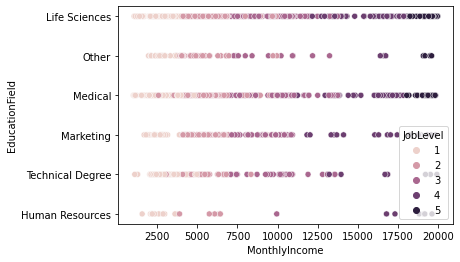

In [16]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y= 'EducationField')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>

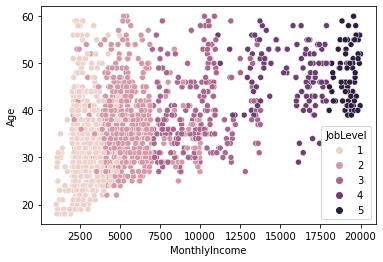

In [17]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y= 'Age')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='NumCompaniesWorked'>

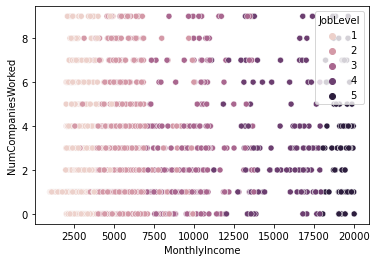

In [18]:
sns.scatterplot(data = df, x = 'MonthlyIncome',hue = 'JobLevel', y= 'NumCompaniesWorked')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='DistanceFromHome'>

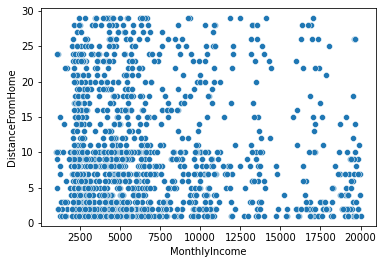

In [19]:
sns.scatterplot(data = df, x = 'MonthlyIncome',y = 'DistanceFromHome')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

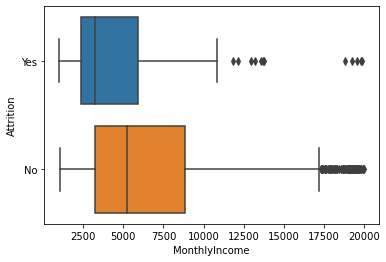

In [20]:
sns.boxplot(data = df, x = 'MonthlyIncome',y = 'Attrition')

Department and education is not seggregating the income, But job level segments the income level.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='EducationField'>

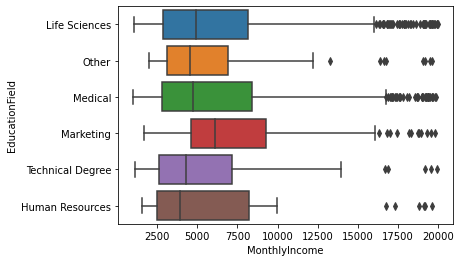

In [21]:
sns.boxplot(data = data, x = 'MonthlyIncome', y = 'EducationField')

We will retain the features.

We will retain the features.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='OverTime'>

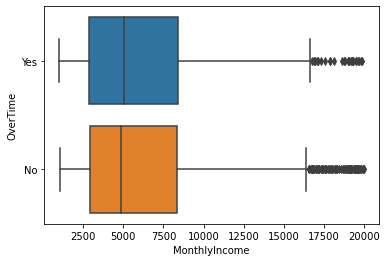

In [22]:
sns.boxplot(data = data, x = 'MonthlyIncome', y = 'OverTime')

In [23]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
select = ['Age', 'Attrition', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
         

In [25]:
#For our purpose to predict salary, we dont need the following .So will drop them
drop = ['BusinessTravel','OverTime','Over18','EmployeeNumber']
data.drop(drop, axis =1 , inplace =True)

In [26]:
categorical =data.select_dtypes(include = object).columns
categorical

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

### Convert all dtypes to non object

In [27]:

data.describe(include = object)

,Attrition,Department,EducationField,Gender,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470,1470
unique,2,3,6,2,9,3
top,No,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1233,961,606,882,326,673


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()        # create an instance of label encoder
col = ['Department' ,'EducationField','Gender', 'JobRole', 'MaritalStatus']
for i in col:
    data[i] = le.fit_transform(data[i])


In [29]:
data.dtypes

Age                          int64
Attrition                   object
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int32
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

### Correlation and feature reduction

<AxesSubplot:>

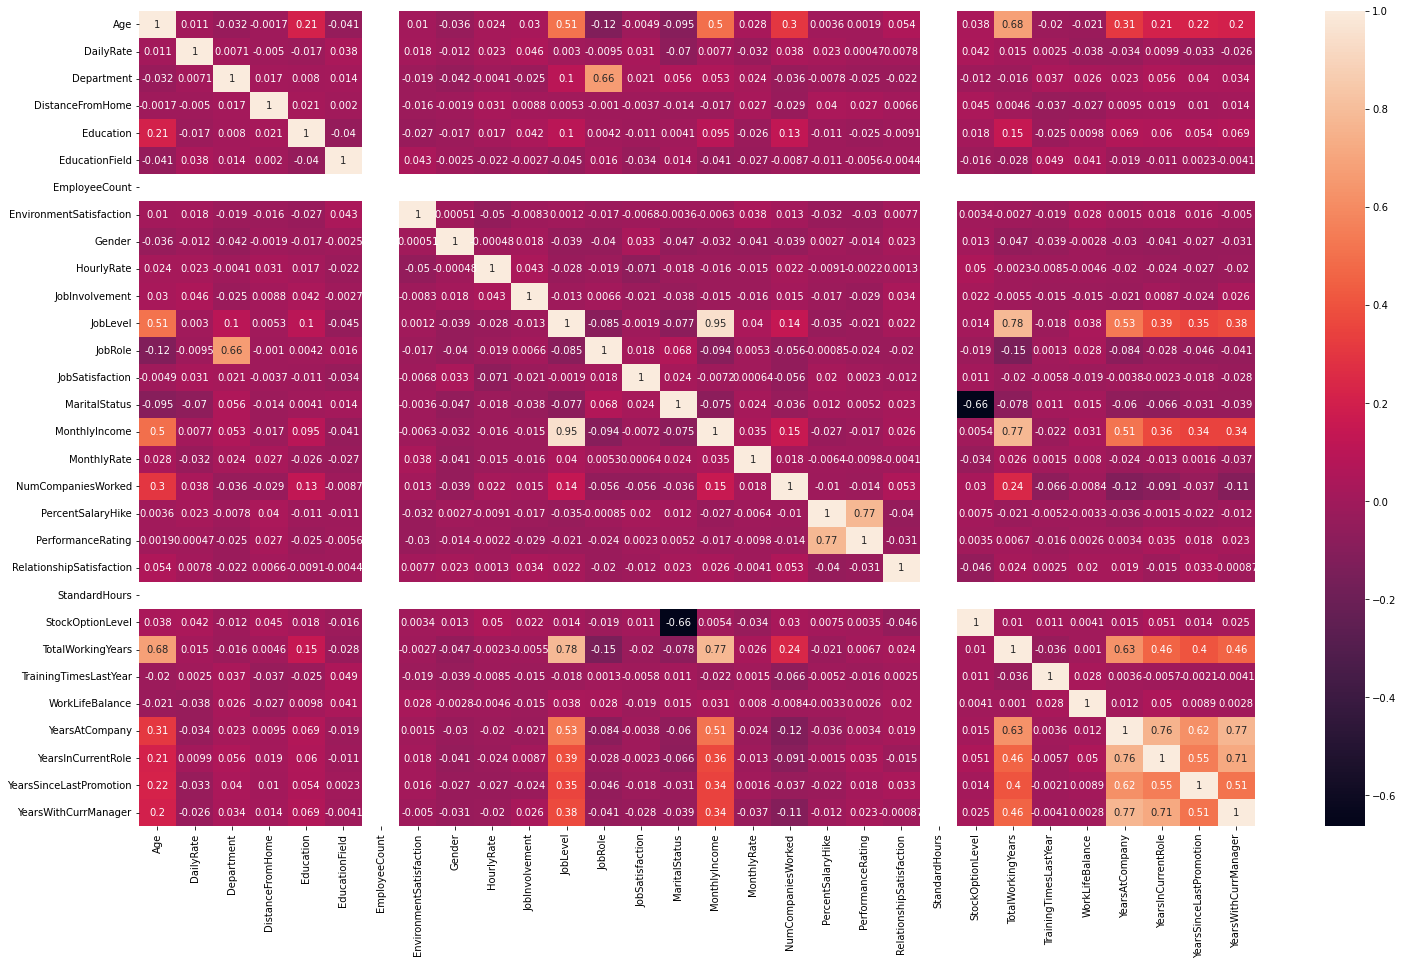

In [30]:
corrmat = data.corr()
plt.subplots(figsize = (25,15))
sns.heatmap(corrmat,annot =True)

In [31]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
 high = ['YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','NumCompaniesWorked','JobLevel','Age','Education','JobRole']

<AxesSubplot:>

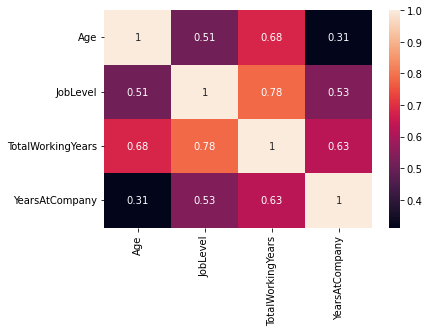

In [33]:
#drop = (['Age','YearsSinceLastPromotion', 'YearsWithCurrManager','EmployeeCount','StandardHours'],axis =1)
high_corr = ['Age','JobLevel', 'TotalWorkingYears', 'YearsAtCompany']
dfhc = data[high_corr]
hc_corr = dfhc.corr()
sns.heatmap(hc_corr,annot =True)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

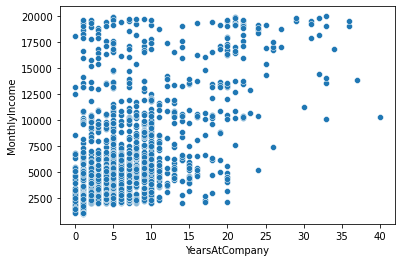

In [34]:
sns.scatterplot(data = df, y = 'MonthlyIncome', x= 'YearsAtCompany')

## Independent and dependent (X & y)

In [35]:
X = data.drop('MonthlyIncome', axis =1)
y = data['MonthlyIncome']

In [36]:
y.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:>

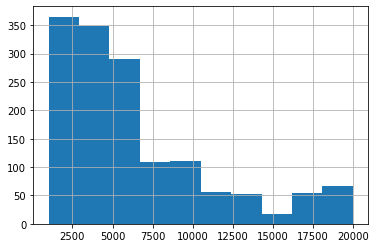

In [37]:
y.hist()

For linear regression model, we should not use skewed data.Will take a log transform.Will use a sqrt transformation


<AxesSubplot:>

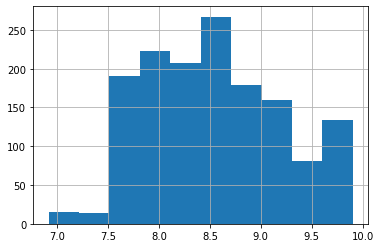

In [38]:
y_norm = np.log(y)
y_norm.hist()
# to get back to y = np.exp(y_norm)

<AxesSubplot:>

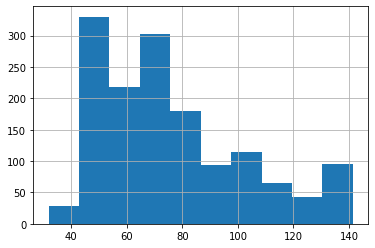

In [39]:
np.sqrt(y).hist()

### Numeric and categorical features

In [40]:
X.dtypes

Age                          int64
Attrition                   object
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int32
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

## Select numerical columns

In [41]:
# identify numeric columns
numeric = X.select_dtypes(exclude = object).columns
numeric

Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [42]:
X.shape

(1470, 30)

In [43]:
data.shape

(1470, 31)

#### Identify Continuous and discrete numeric features

In [44]:
X[numeric].nunique()

Age                           43
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [45]:
continuous = ['DailyRate','DistanceFromHome', 'HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
              'YearsAtCompany']


In [46]:
discrete = set(numeric).difference(set(continuous))


# Simple linear  regression

First we will do a simple regression using 1 feature.(JobLevel)

In [47]:
X['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [48]:
#There are 5 different job levels.We will use on hot encoding.
X1 = pd.get_dummies(X['JobLevel'],drop_first = True)
#X1 = X['JobLevel']
#y already available
# X['JobLevel'] error : 1910301.9662980335  most corelated
# X['JobRole'] error :4437020.224336961 most granular..good to combine with other feaures 

In [49]:
X1.head()

,2,3,4,5
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [53]:

lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1910301.9662980335


Text(0, 0.5, 'y_pred')

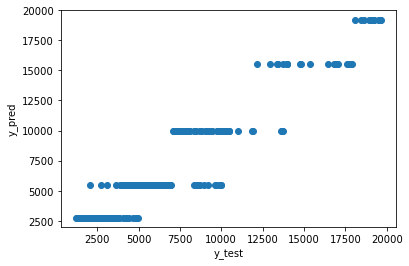

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## With y_norm

Eventhough error appears small, there is the same amount of error after scaling back to original values.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X1,y_norm, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   0.059351437326824644


Text(0, 0.5, 'y_pred')

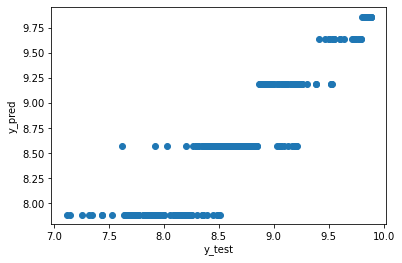

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [57]:
print("Mean squared error after inverting normalised y is  ", mean_squared_error(np.exp(y_test), np.exp(y_pred)))

Mean squared error after inverting normalised y is   1926778.4075182008


Text(0, 0.5, 'y_pred')

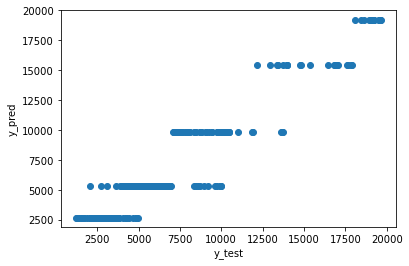

In [58]:
plt.scatter(np.exp(y_test),np.exp(y_pred))
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Linear Regression with 2 features

In [59]:
X2 = df[['JobLevel','JobRole']]
#[JobLevel, totalWorkingYears]  1857687.7295763274
#['JobLevel','JobRole'] 1428870.2461094472
#['JobLevel','Gender'] 2376872.9924016832
#['JobRole','Gender'] 4431257.96606843
X2.head()

,JobLevel,JobRole
0,2,Sales Executive
1,2,Research Scientist
2,1,Laboratory Technician
3,1,Research Scientist
4,1,Laboratory Technician


In [60]:
#X2.TotalWorkingYears.describe()

In [61]:
#X2.TotalWorkingYears.hist()

In [62]:
# # split to bins
# bins = [0,5,15,25,40]  #[0,5,15,25,40] error was 1857687.7295763274
# groups = ['beg', 'Med', 'High', 'Very High']
# X['WorkExp'] = pd.cut(X['TotalWorkingYears'],bins,labels = groups)

In [63]:
# #with one hot encoding
# X2 = X[['JobLevel','WorkExp']]
# X2 = pd.get_dummies(X2,columns = ['JobLevel','WorkExp'], drop_first = True)

In [64]:
X2 = pd.get_dummies(X2, drop_first =True)

In [65]:
X2.head()

,JobLevel,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,2,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1428870.2461094472


Text(0, 0.5, 'y_pred')

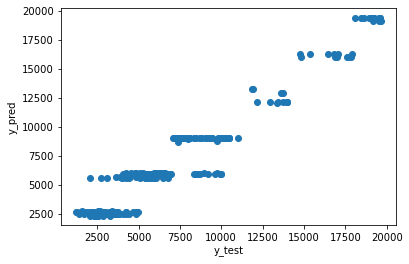

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Adding more Features

In [68]:
# features selected based on data analysis using corr matrix and plots
XM = df[['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField','YearsInCurrentRole','Age','Gender','MaritalStatus']]
XM.head()
# ['JobRole','JobLevel', 'Education'] 1432491.6547571963
#['JobRole','JobLevel', 'Education','Age','EducationField'] 1437621.3028038284
# ['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField']  1377530.8040554405
# ['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField','NumCompaniesWorked'] 1378799.0282067163
# ['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField','YearsInCurrentRole','Age'] 1376360.5503001472
# ['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField','YearsInCurrentRole','Age','Gender']  1371592.1815328326
# ['JobRole','JobLevel', 'Education','TotalWorkingYears','EducationField','YearsInCurrentRole','Age','Gender','MaritalStatus']  1369403.444744427

,JobRole,JobLevel,Education,TotalWorkingYears,EducationField,YearsInCurrentRole,Age,Gender,MaritalStatus
0,Sales Executive,2,2,8,Life Sciences,4,41,Female,Single
1,Research Scientist,2,1,10,Life Sciences,7,49,Male,Married
2,Laboratory Technician,1,2,7,Other,0,37,Male,Single
3,Research Scientist,1,4,8,Life Sciences,7,33,Female,Married
4,Laboratory Technician,1,1,6,Medical,2,27,Male,Married


In [69]:
XM = pd.get_dummies(XM,drop_first = True)
XM.head()

,JobLevel,Education,TotalWorkingYears,YearsInCurrentRole,Age,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,...,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,2,2,8,4,41,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,2,1,10,7,49,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,2,7,0,37,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,1,4,8,7,33,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,1,6,2,27,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(XM,y, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1369403.444744427


Text(0, 0.5, 'y_pred')

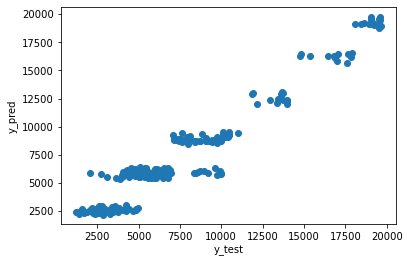

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## LR with highly correlaated features 

Lowest MSE acheived(1359437.542443245) with the following features : 
</p>'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked', 'JobLevel', 'Age', 'Education', 'JobRole', 'Gender', 'MaritalStatus'

In [72]:
# features selected based on correlation matrix
high = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked', 'JobLevel', 'Age', 'Education', 'JobRole']

In [73]:
# extended features based on plots analysis
high.extend(['Gender','MaritalStatus'])
print(high)

['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked', 'JobLevel', 'Age', 'Education', 'JobRole', 'Gender', 'MaritalStatus']


In [74]:
# with high : 1366331.6969285281
# high.extend(['Gender','MaritalStatus'])  1359437.542443245 ##LOWEST MSE
#high.extend(['Gender','MaritalStatus','EducationField'])  1367315.389039727

In [75]:
Xh = df[high]
Xh.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,JobLevel,Age,Education,JobRole,Gender,MaritalStatus
0,6,4,0,5,8,8,2,41,2,Sales Executive,Female,Single
1,10,7,1,7,10,1,2,49,1,Research Scientist,Male,Married
2,0,0,0,0,7,6,1,37,2,Laboratory Technician,Male,Single
3,8,7,3,0,8,1,1,33,4,Research Scientist,Female,Married
4,2,2,2,2,6,9,1,27,1,Laboratory Technician,Male,Married


In [76]:
Xh = pd.get_dummies(Xh,drop_first =True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(Xh,y, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1359437.542443245


Text(0, 0.5, 'y_pred')

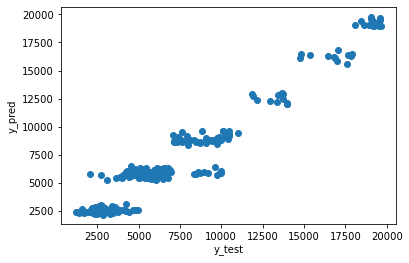

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0.5, 1.0, 'y_train')

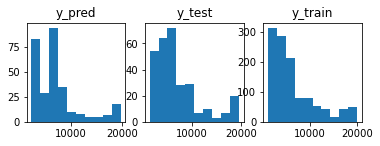

In [79]:

plt.subplot(2,3,1)
plt.hist(y_pred)
plt.title('y_pred')
plt.subplot(2,3,2)
plt.hist(y_test)
plt.title('y_test')
plt.subplot(2,3,3)
plt.hist(y_train)
plt.title('y_train')


### LR with feature scaling

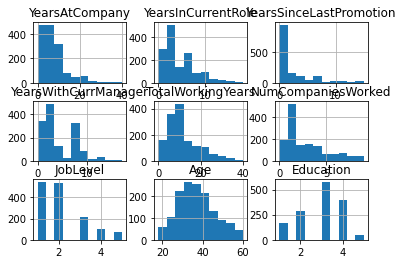

<Figure size 1368x1008 with 0 Axes>

In [80]:
df[high].hist()
plt.figure(figsize = (19,14))
plt.tight_layout()
plt.show()

In [81]:
# 'YearsAtCompany' doesnt have a linear relation
Xhsc = Xh.copy()
#y already available
# with ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'] , error binned: 2241845.344410165
# without age , error binned [ 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'] : 1858504.901081725
# without age , error scaled ['JobLevel', 'TotalWorkingYears', 'YearsAtCompany'] :  1885880.7697757531
# with age , error scaled : 1855023.0476857156 
# Without totalworking years(inter corelated with 'Age', 'JobLevel',  'YearsAtCompany' ) scaled:  1910151.7223266982
# Without totalworking years(inter corelated with 'Age', 'JobLevel',  'YearsAtCompany' ) binned: 1919748.5505503537
# data[['Age', 'JobLevel', 'Gender','TotalWorkingYears', 'JobRole']]  1861306.3680647854
# ['JobLevel', 'Gender','TotalWorkingYears', 'JobRole']

In [82]:
Xhsc.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,JobLevel,Age,Education,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,6,4,0,5,8,8,2,41,2,0,0,0,0,0,0,1,0,0,0,1
1,10,7,1,7,10,1,2,49,1,0,0,0,0,0,1,0,0,1,1,0
2,0,0,0,0,7,6,1,37,2,0,1,0,0,0,0,0,0,1,0,1
3,8,7,3,0,8,1,1,33,4,0,0,0,0,0,1,0,0,0,1,0
4,2,2,2,2,6,9,1,27,1,0,1,0,0,0,0,0,0,1,1,0


In [83]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [84]:
Xhsc['Age'] = sc.fit_transform(Xhsc[['Age']])

In [85]:
Xhsc[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears']].describe()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,7.008163,4.229252,2.187755,4.123129,11.279592
std,6.126525,3.623137,3.222430,3.568136,7.780782
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,2.000000,6.000000
50%,5.000000,3.000000,1.000000,3.000000,10.000000
75%,9.000000,7.000000,3.000000,7.000000,15.000000
max,40.000000,18.000000,15.000000,17.000000,40.000000


array([[<AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsInCurrentRole'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:>]], dtype=object)

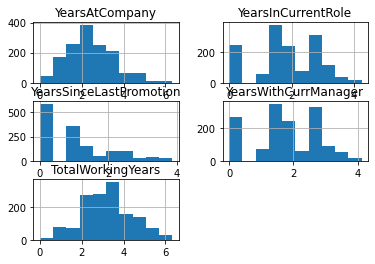

In [86]:
sqrt = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears']
for f in sqrt:
    Xhsc[f] = np.sqrt(Xhsc[f])
Xhsc[sqrt].hist()


In [87]:
Xhsc.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,JobLevel,Age,Education,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,2.449490,2.000000,0.000000,2.236068,2.828427,8,2,0.446350,2,0,0,0,0,0,0,1,0,0,0,1
1,3.162278,2.645751,1.000000,2.645751,3.162278,1,2,1.322365,1,0,0,0,0,0,1,0,0,1,1,0
2,0.000000,0.000000,0.000000,0.000000,2.645751,6,1,0.008343,2,0,1,0,0,0,0,0,0,1,0,1
3,2.828427,2.645751,1.732051,0.000000,2.828427,1,1,-0.429664,4,0,0,0,0,0,1,0,0,0,1,0
4,1.414214,1.414214,1.414214,1.414214,2.449490,9,1,-1.086676,1,0,1,0,0,0,0,0,0,1,1,0


In [88]:
Xhsc = pd.get_dummies(Xhsc,drop_first = True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(Xhsc,y, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1375300.8590110564


Text(0, 0.5, 'y_pred')

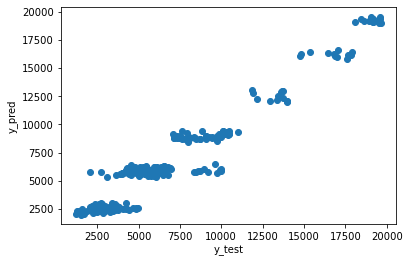

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Remove Inter corelated features from Xh

<AxesSubplot:>

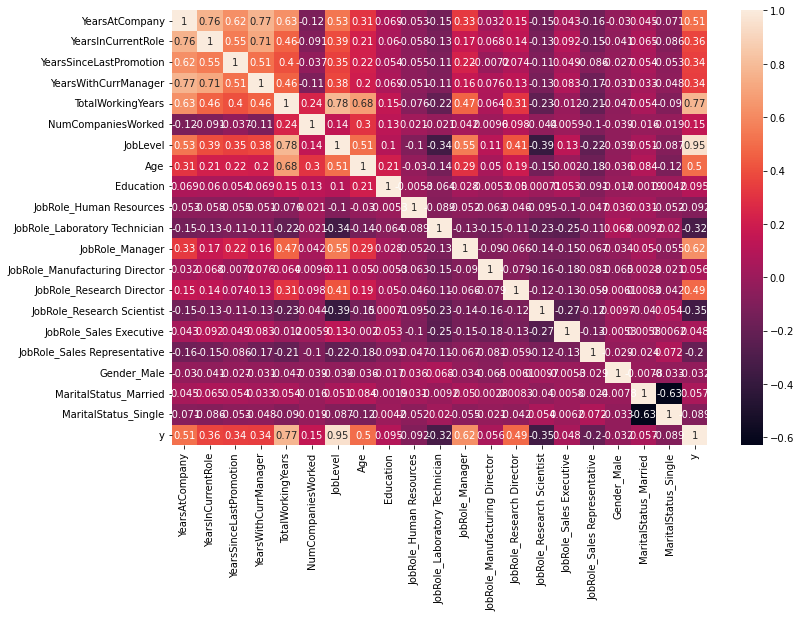

In [91]:
cordf = Xh.copy()
cols = cordf.columns
cordf['y'] = y
corr = cordf.corr()
plt.subplots(figsize =(12,8))
sns.heatmap(corr, annot =True)

In [92]:
drop = ['YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','YearsAtCompany']

cordf.drop(drop,axis =1 ,inplace =True)

<AxesSubplot:>

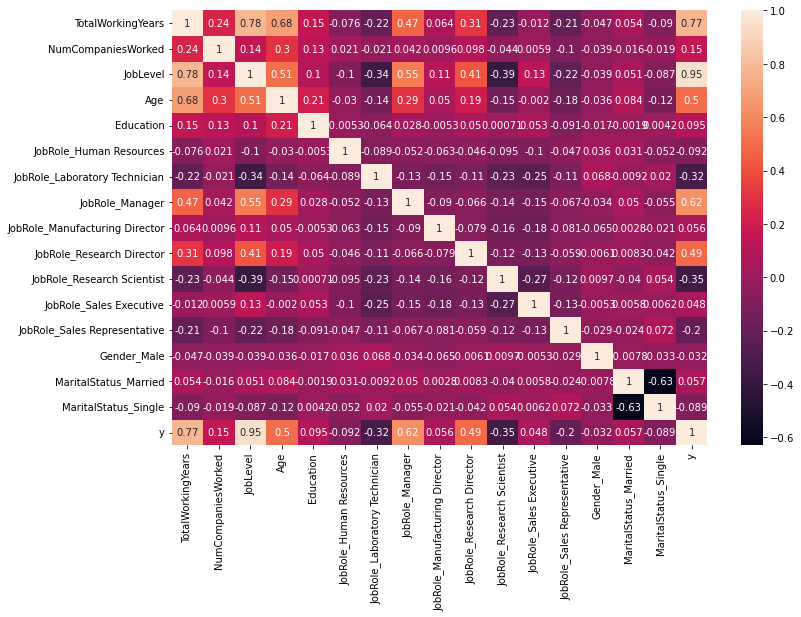

In [93]:
plt.subplots(figsize =(12,8))
sns.heatmap(cordf.corr(),annot = True)

In [94]:
Xfr = cordf.drop('y',axis =1)
y = cordf['y']

In [95]:
Xfr.describe()

,TotalWorkingYears,NumCompaniesWorked,JobLevel,Age,Education,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,2.693197,2.063946,36.923810,2.912925,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.600000,0.457823,0.319728
std,7.780782,2.498009,1.106940,9.135373,1.024165,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.490065,0.498387,0.466530
min,0.000000,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,2.000000,2.000000,36.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.000000,4.000000,3.000000,43.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,40.000000,9.000000,5.000000,60.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
Xfr['Age'] = sc.fit_transform(Xfr[['Age']])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(Xfr,y, test_size=0.2, random_state=42)
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, y_pred))

Mean squared error is   1357836.47350292


Text(0, 0.5, 'y_pred')

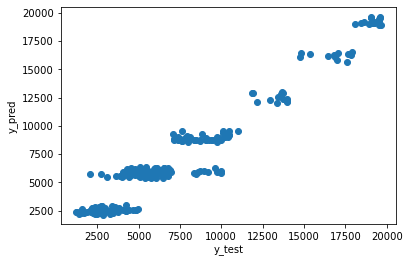

In [98]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Check with Ridge

In [99]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(Xfr,y, test_size = 0.2, random_state = 42)

In [100]:
lrn = Ridge()

In [101]:
lr_model = lrn.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Mean squared error is  ", mean_squared_error(y_test, lr_pred))

Mean squared error is   1360003.1686460827
